
<img src="1519895156650.png" style="float:left">

# The Sparks Foundation
## Task 2 : Prediction using Unsupervised ML (Level-Beginner)

### By- Satyam Tiwari 
#### (Data Science & Business Analytics  Intern)

   ###    In this task we'll try to predict the optimum number of clusters and represent it visually From the given ‘Iris’ dataset.

### importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### For ignoring Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading & showing the Data

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Printing a concise summary of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Observations :-
#### 1. By this we get the dimension of the data i.e. `150 Rows` & `5 Columns`.
#### 2. `No NULL` values present in the Data.

### Dropping columns which is not required for clustring

In [5]:
df1=df.drop(['Id','Species'],axis=1)

### Statistical measures of new Data

In [6]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for Outliers in the Data 

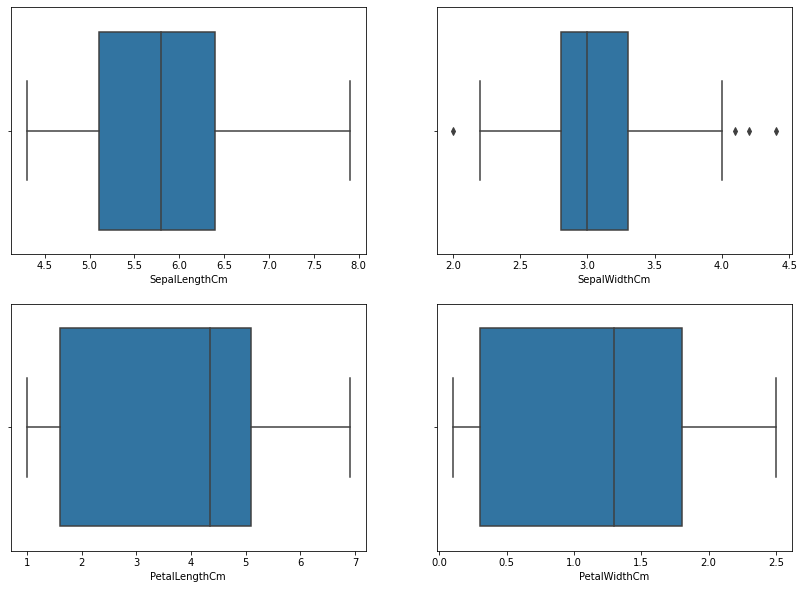

In [7]:
fig,axs=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(df1['SepalLengthCm'],ax=axs[0,0])
sns.boxplot(df1['SepalWidthCm'],ax=axs[0,1])
sns.boxplot(df1['PetalLengthCm'],ax=axs[1,0])
sns.boxplot(df1['PetalWidthCm'],ax=axs[1,1]);

#### Outliers found in `SepalWidthCm` only

### Removing Outliers found in SepalWidthCm

In [8]:
for i in ['SepalWidthCm']:
    q3,q1=np.percentile(df1.loc[:,i],[75,25])
    
    iqr=q3-q1
    
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)

### Replace the Outliers with NaN (Not a Number) 

In [9]:
df1.loc[df1[i]>upper,i]=np.nan
df1.loc[df1[i]<lower,i]=np.nan

### Replacing the NaN's with average value of the column

In [10]:
df1['SepalWidthCm'].fillna(df1['SepalWidthCm'].mean(),inplace=True)

### Plotting Outliers removed box plot of SepalWidthCm

<AxesSubplot:xlabel='SepalWidthCm'>

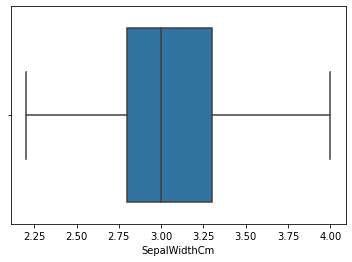

In [11]:
sns.boxplot(x=df1['SepalWidthCm'])


<img src="Screenshot 2021-04-15 193014.png" style="float:right" width="200">

## Finding the optimum number of clusters 

## for k-means classification 

## using "Elbow Method"

### Calculating the "Within cluster sum of squares"

In [12]:
x = df1.iloc[:,-2:].values
y = df1.iloc[:,[0,1]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)    

### Now plotting the graph which shows us "Elbow"

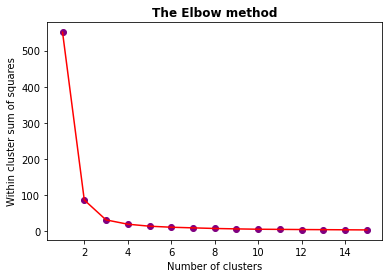

In [13]:
plt.scatter(range(1,16),wcss,c='purple')
plt.plot(range(1,16), wcss,c='red')
plt.title('The Elbow method',fontweight='bold')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

## from observing the above graph we could clearly see that the Elbow point is `3` which is the optimum number of clusters

### Training the Model

In [14]:
km= KMeans(n_clusters = 3 ,init = 'k-means++',random_state = 0)
a_kmeans = km.fit_predict(x)
kms= KMeans(n_clusters = 3 ,init = 'k-means++',random_state = 0)
b_kmeans = kms.fit_predict(y)
a_kmeans,b_kmeans

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1,
        1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
        1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1

## Visualising the clusters with Centroids



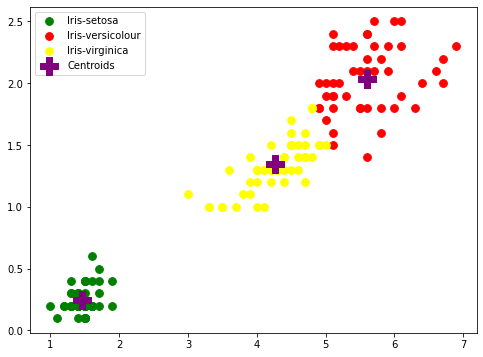

In [15]:
plt.figure(figsize=(8,6))

plt.scatter(x[a_kmeans == 0, 0], x[a_kmeans == 0, 1],s = 60, c = 'green', label = 'Iris-setosa')
plt.scatter(x[a_kmeans == 1, 0], x[a_kmeans == 1, 1],s = 60, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[a_kmeans == 2, 0], x[a_kmeans == 2, 1],s = 60, c = 'yellow', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 300, marker='P',c = 'purple', label = 'Centroids')
plt.legend()

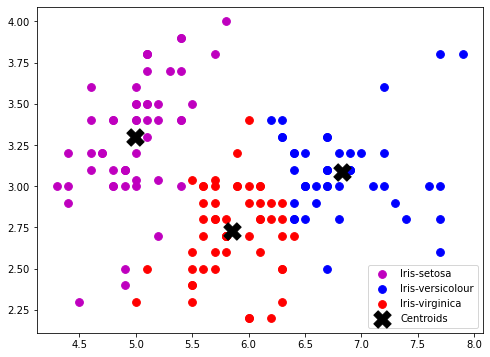

In [16]:
plt.figure(figsize=(8,6))

plt.scatter(y[b_kmeans == 0, 0], y[b_kmeans == 0, 1],s = 60, c = 'm', label = 'Iris-setosa')
plt.scatter(y[b_kmeans == 1, 0], y[b_kmeans == 1, 1],s = 60, c = 'b', label = 'Iris-versicolour')
plt.scatter(y[b_kmeans == 2, 0], y[b_kmeans == 2, 1],s = 60, c = 'r', label = 'Iris-virginica')

plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:,1], s = 300,marker='X', c = 'k', label = 'Centroids')
plt.legend()